# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
    <p>The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies.
    Over last decades it is continuously grow because of the city’s important role in government and commercial business.
    
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of new delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters 

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## What places are have best restaurant in New Delhi?

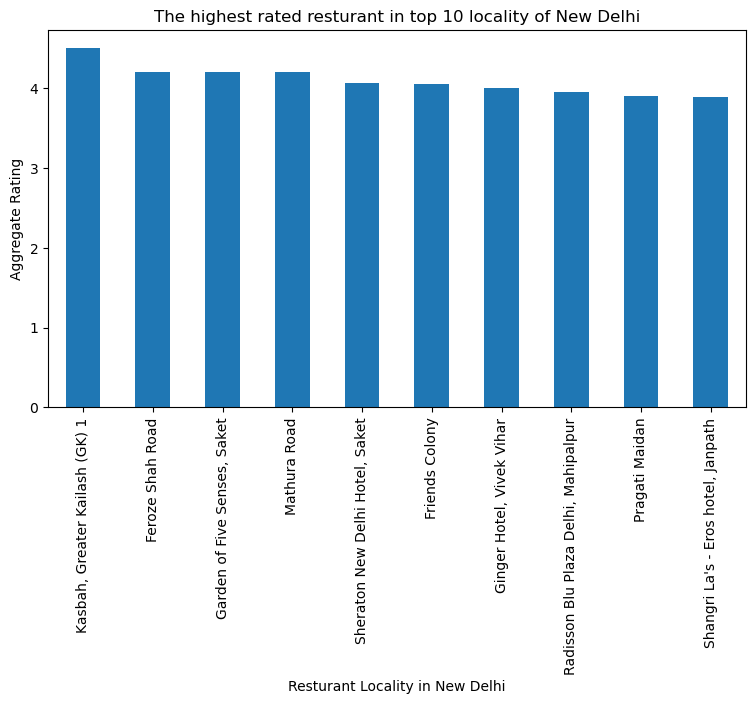

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

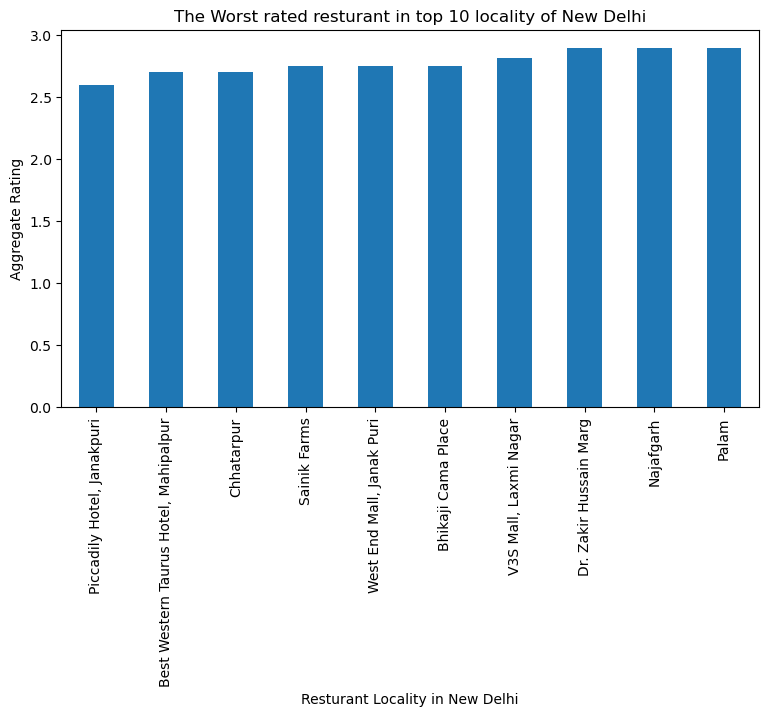

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for edible person in New Delhi city?

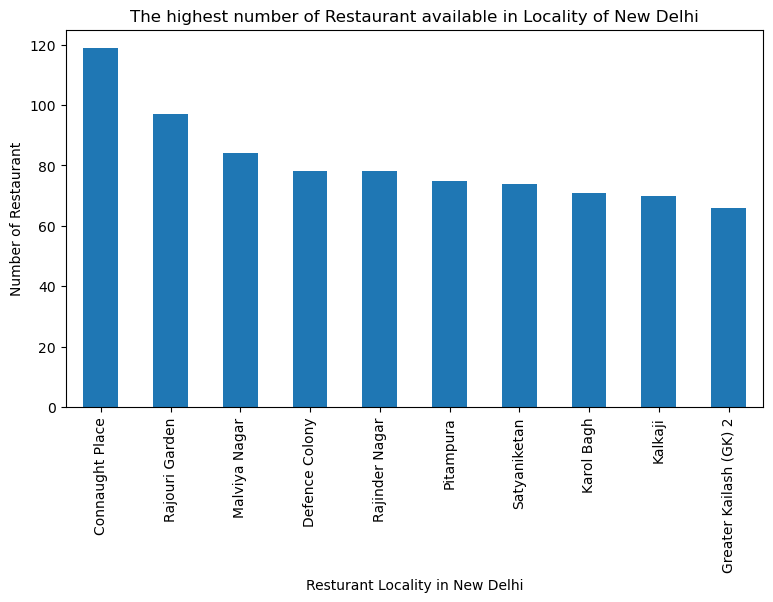

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Connaught Place</b> is the best places for edible person to stay there.

## Which place are not suitable for edible person in New Delhi city?

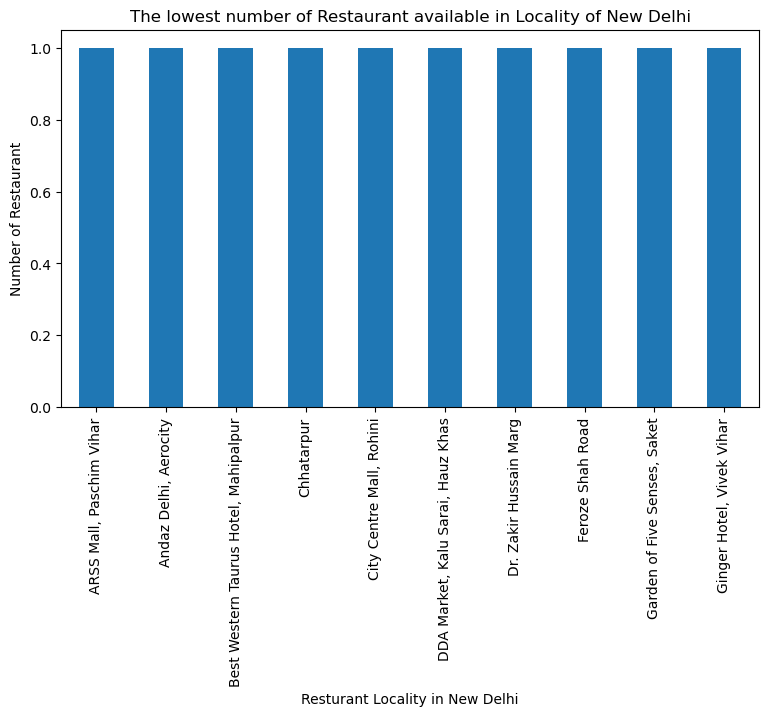

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in New Delhi city

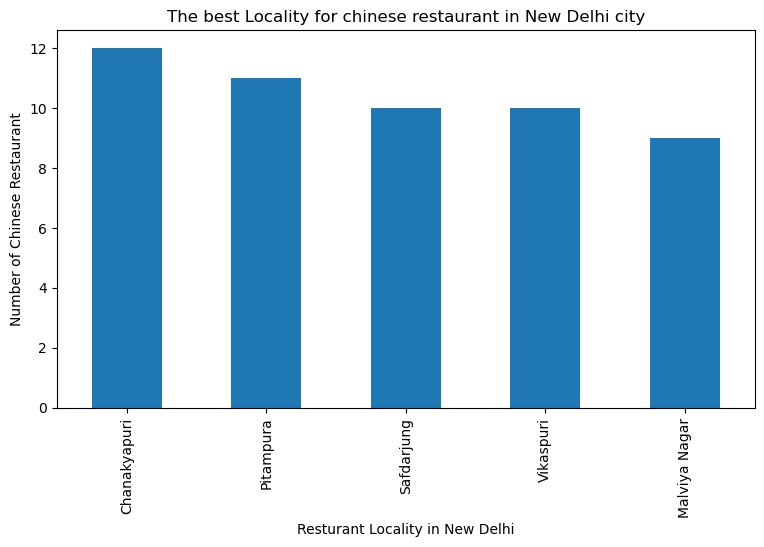

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

<b>Chanakyapuri</b> is the best place for Chinese restaurant.

## which places are the best chinese resturants in New Delhi?  

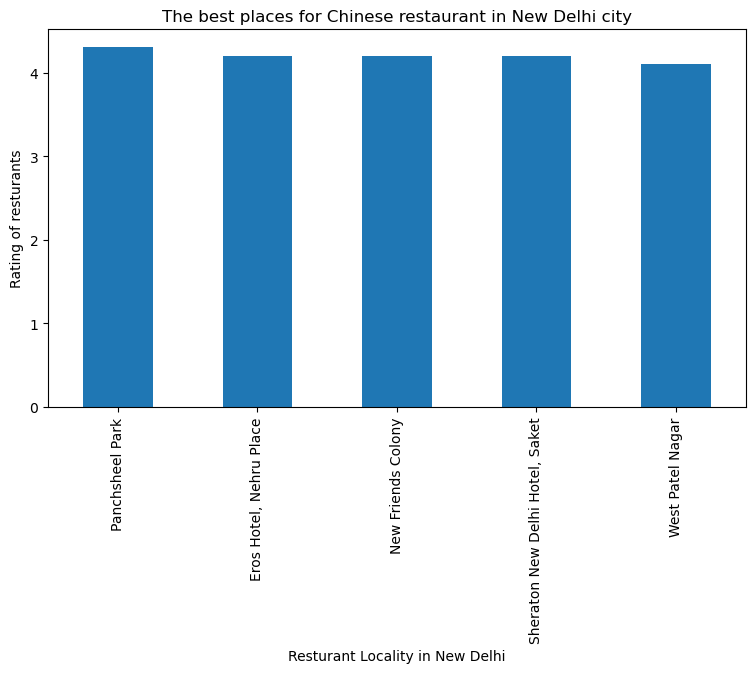

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> Panchsheel park</b> is best Chinese resturants.

### Data transformation
Based on Locality grouping the data

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [17]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [18]:

## Define Foursquare Credentials and Version
CLIENT_ID = '1IRPHIJE14PITGD4ORO0QS4INYUVMDXEURYDMPYOV5EH1KAR' # Foursquare ID
CLIENT_SECRET = 'P115AS0PZSAPBLHIESS4ZVFUQ1CWX2DHPWKYRK2IYYIBIJQL' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1IRPHIJE14PITGD4ORO0QS4INYUVMDXEURYDMPYOV5EH1KAR
CLIENT_SECRET:P115AS0PZSAPBLHIESS4ZVFUQ1CWX2DHPWKYRK2IYYIBIJQL


## create a function to repeat the same process to all the Locality in New Delhi

In [19]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [20]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [22]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                       10                  10     10   
Adchini                                         6                   6      6   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          28                  28     28   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                    10               10   
Adchini                                      6                6   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       28               28   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                    10  
Adchini                                      6  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       28  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    28  

[239 rows x 6 columns]

In [23]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 207 uniques categories.


In [24]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport Food Court  Airport Lounge  Airport Service  \
0                   0                   0               0                0   
1                   0                   0               0                0   
2                   0                   0               0                0   
3                   0                   0               0                0   
4                   0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 208 columns]

In [25]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality  ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.1           0.100000   
1                           Adchini  0.0           0.000000   
2     Aditya Mega Mall, Karkardooma  0.0           0.000000   
3                          Aerocity  0.0           0.000000   
4     Aggarwal City Mall, Pitampura  0.0           0.000000   
..                              ...  ...                ...   
234  West Gate Mall, Rajouri Garden  0.0           0.000000   
235                West Patel Nagar  0.0           0.000000   
236           Worldmark 1, Aerocity  0.0           0.035714   
237                     Yusuf Sarai  0.0           0.000000   
238        ibis New Delhi, Aerocity  0.0           0.000000   

     Afghan Restaurant  African Restaurant  Airport Food Court  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   
..                 ...                 ...                 ...   
234                0.0                 0.0                 0.0   
235                0.0                 0.0                 0.0   
236                0.0                 0.0                 0.0   
237                0.0                 0.0                 0.0   
238                0.0                 0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0          0.000000              0.0          0.000000             0.000000   
1          0.000000              0.0          0.000000             0.000000   
2          0.000000              0.0          0.000000             0.000000   
3          0.142857              0.0          0.142857             0.000000   
4          0.000000              0.0          0.000000             0.000000   
..              ...              ...               ...                  ...   
234        0.000000              0.0          0.000000             0.058824   
235        0.000000              0.0          0.000000             0.000000   
236        0.000000              0.0          0.000000             0.000000   
237        0.000000              0.0          0.000000             0.000000   
238        0.000000              0.0          0.000000             0.000000   

     ...  Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0    ...    0.0       0.000000                 0.0               0.0   
1    ...    0.0       0.000000                 0.0               0.0   
2    ...    0.0       0.000000                 0.0               0.0   
3    ...    0.0       0.000000                 0.0               0.0   
4    ...    0.0       0.000000                 0.0               0.0   
..   ...    ...            ...                 ...               ...   
234  ...    0.0       0.000000                 0.0               0.0   
235  ...    0.0       0.000000                 0.0               0.0   
236  ...    0.0       0.035714                 0.0               0.0   
237  ...    0.0       0.000000                 0.0               0.0   
238  ...    0.0       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236   

In [26]:
New_Delhi_grouped.shape

(239, 208)

In [27]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant   0.2
1                             ATM   0.1
2                     Coffee Shop   0.1
3  Multicuisine Indian Restaurant   0.1
4                          Market   0.1


----Adchini----
               venue  freq
0               Café  0.33
1                Pub  0.17
2  Indian Restaurant  0.17
3        Coffee Shop  0.17
4           Boutique  0.17


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1   Rental Car Location  0.14
2  Fast Food Restaurant  0.14
3        Airport Lounge  0.14
4           Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0           Pizza Place  0.25
1     Indian Restaurant  0.25
2  Fast Food Res

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
234  West Gate Mall, Rajouri Garden                  Café   
235                West Patel Nagar           Pizza Place   
236           Worldmark 1, Aerocity                 Hotel   
237                     Yusuf Sarai     Indian Restaurant   
238        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0                     ATM           Coffee Shop   
1                     Pub     Indian Restaurant   
2           Shopping Mall             Multiplex   
3     Rental Car Location  Fast Food Restaurant   
4       Indian Restaurant  Fast Food Restaurant   
..                    ...                   ...   
234  Fast Food Restaurant           Pizza Place   
235     Indian Restaurant             Juice Bar   
236           Coffee Shop       Bed & Breakfast   
237  Fast Food Restaurant           Coffee Shop   
238           Coffee Shop             Hotel Bar   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant                Market   
1                       Coffee Shop              Boutique   
2                 Indian Restaurant                 Hotel   
3                    Airport Lounge           Coffee Shop   
4                  Department Store      Pedestrian Plaza   
..                              ...                   ...   
234                  Cosmetics Shop             Multiplex   
235                            Park        Nightlife Spot   
236                       Hotel Bar   Dumpling Restaurant   
237             Japanese Restaurant                   Bar   
238             Dumpling Restaurant                Lounge   

    6th Most Common Venue           7th Most Common Venue  \
0          Sandwich Place              Chinese Restaurant   
1                     ATM                  Nightlife Spot   
2                    Café                  Nightlife Spot   
3        Airport Terminal                  Nightlife Spot   
4               Nightclub              Mughlai Restaurant   
..                    ...                             ...   
234            Shoe Store              Chinese Restaurant   
235    Mughlai Restaurant  Multicuisine Indian Restaurant   
236                Lounge                   Shopping Mall   
237                 Hotel               Korean Restaurant   
238                Bakery                             Gym   

              8th Most Common Venue    9th Most Common Venue  \
0                       Pizza Place        Accessories Store   
1                         Multiplex                   Museum   
2    Multicuisine Indian Restaurant                   Museum   
3                         Nightclub  New American Restaurant   
4    Multicuisine Indian Restaurant                Multiplex   
..                              ...                      ...   
234                      Hookah Bar               Restaurant   
235                       Multiplex                   Museum   
236                             Gym                      Spa   
237                Asian Restaurant                     Park   
238              Punjabi Restaurant                      Spa   

      10th Most Common Venue  
0                Music Venue  
1                Music Store  
2                Music Store  
3              National Park  
4                     Museum  
..                       ...  
234      American Restaurant  
235              Music Store  
236               Restaurant  
237  New American Restaurant  
238          Bed & Breakfast  

[239 rows x 11 columns]

In [30]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [32]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-32-31180001c6d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               3   
3                         Average           59               4   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1                  Café                   Pub     Indian Restaurant   
2           Pizza Place         Shopping Mall             Multiplex   
3                 Hotel   Rental Car Location  Fast Food Restaurant   
4           Pizza Place     Indian Restaurant  Fast Food Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant                Market        Sandwich Place   
1                     Coffee Shop              Boutique                   ATM   
2               Indian Restaurant                 Hotel                  Café   
3                  Airport Lounge           Coffee Shop      Airport Terminal   
4                Department Store      Pedestrian Plaza             Nightclub   

  7th Most Common Venue           8th Most Common Venue  \
0    Chinese Restaurant                     Pizza Place   
1        Nightlife Spot                       Multiplex   
2        Nightlife Spot  Multicuisine Indian Restaurant   
3        Nightlife Spot                       Nightclub   
4    Mughlai Restaurant  Multicuisine Indian Restaurant   

     9th Most Common Venue 10th Most Common Venue  
0        Accessories Store            Music Venue  
1                   Museum            Music Store  
2                   Museum            Music Store  
3  New American Restaurant          National Park  
4                Multiplex                 Museum

In [33]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
93   28.554084    3.541667                   Average, Good, Very Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
108  28.563827    3.800000                            Good, Very Good   
110  28.635391    3.040385             Average, Good, Poor, Very Good   
120  28.673708    3.133333                                    Average   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
140  28.627959    3.004167                                    Average   
143  28.564494    3.140625                   Average, Good, Very Good   
158  28.700027    3.157333                        Average, Good, Poor   
165  28.539464    2.900000                                    Average   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
174  28.550802    3.250000                              Average, Good   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
185  28.683364    3.000000                              Average, Good   
189  28.620715    3.880000                   Average, Good, Very Good   
190  28.577107    3.100000                                    Average   
200  28.564288    3.200000                                    Average   
202  28.646593    3.280952                   Average, Good, Very Good   
203  28.601187    3.633333                              Average, Good   
206  28.538993    3.450000                              Average, Good   
207  28.625445    3.600000                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
213  28.623619    3.466667                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
217  28.535183    3.066667                                    Average   
226  28.525054    3.322222                              Average, Good   
227  28.559704    3.278261                   Average, Good, Very Good   
228  28.596073    3.052941                              Average, Good   
229  28.692519    3.606452        Average, Excellent, Good, Very Good   
234  28.630044    2.750000                              Average, Poor   

     No_of_Votes  Cluster Labels    1st Most Common Venue  \
1      

In [35]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
11   28.562580    3.750000  Average, Good, Very Good          875   
14   28.693969    3.378571             Average, Good         2343   
..         ...         ...                       ...          ...   
223  28.619954    2.905714             Average, Poor          242   
224  28.636921    2.819231       Average, Good, Poor         2265   
225  28.524070    3.686364  Average, Good, Very Good         4001   
232  28.667344    3.077273       Average, Good, Poor          939   
233  28.695096    3.050000                   Average           86   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
5                 1           Pizza Place                 Multiplex   
6                 1            Steakhouse               Coffee Shop   
7                 1           Coffee Shop          Asian Restaurant   
11                1   Japanese Restaurant         Electronics Store   
14                1           Pizza Place               Coffee Shop   
..              ...                   ...                       ...   
223               1                   ATM         Indian Restaurant   
224               1          Dessert Shop  Mediterranean Restaurant   
225               1           Pizza Place        Chinese Restaurant   
232               1             Juice Bar        Athletics & Sports   
233               1     Convenience Store                       ATM   

       3rd Most Common Venue 4th Most Common Venue  \
5              Shopping Mall  Gym / Fitness Center   
6    New American Restaurant     Food & Drink Shop   
7             Clothing Store  Fast Food Restaurant   
11          Malay Restaurant  Fast Food Restaurant   
14   South Indian Restaurant        Sandwich Place   
..                       ...                   ...   
223           Nightlife Spot    Mughlai Restaurant   
224               Playground  Fast Food Restaurant   
225             Dessert Shop                   Spa   
232        Indian Restaurant       Bed & Breakfast   
233           Nightlife Spot    Mughlai Restaurant   

              5th Most Common Venue  6th Most Common Venue  \
5              Fast Food Restaurant         Sandwich Place   
6                            Market                    ATM   
7                              Café          Shopping Mall   
11                 Pedestrian Plaza                Parking   
14                      Snack Place       Asian Restaurant   
..                              ...                    ...   
223  Multicuisine Indian Restaurant              Multiplex   
224                          Office      Food & Drink Shop   
225   Vegetarian / Vegan Restaurant                    Bar   
232                       Gift Shop  Performing Arts Venue   
233  Multicuisine Indian Restaurant              Multiplex   

    7th Most Common Venue           8th Most Common Venue  \
5               Nightclub  Multicuisine Indian Restaurant   
6          Nightlife Spot                       Multiplex   
7      Italian Restaurant              Chinese Restaurant   
11              Multiplex                          Museum   
14             Smoke Shop               Indian Restaurant   
..                    ...                             ...   
223                Museum                     Music Store   
224            Food Court                            Café   
225  Fast Food Restaurant                  Sandwich Place   
232      Pedestrian Plaza              Mughlai Restaurant   
233                Museum                     Music Store   

              9th Most Common Venue 10th Most Common Venue  
5                            Museum            Music Store  
6                            Museum            Music Store  
7                 I

In [36]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
146  28.53504       3.175  Average, Good           60               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
146         Women's Store        Nightlife Spot    Mughlai Restaurant   

              4th Most Common Venue 5th Most Common Venue  \
146  Multicuisine Indian Restaurant             Multiplex   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
146                Museum           Music Store           Music Venue   

    9th Most Common Venue 10th Most Common Venue  
146         National Park           Neighborhood

In [37]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
2    28.656131    3.275000                              Average, Good   
4    28.690020    3.033333                                    Average   
12   28.641698    3.050000                                    Average   
13   28.690182    3.090000                        Average, Good, Poor   
23   28.656414    3.358182                   Average, Good, Very Good   
33   28.657388    3.320000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
59   28.654883    3.053846                              Average, Good   
61   28.668181    3.400000                                    Average   
65   28.556980    3.272414                        Average, Good, Poor   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
113  28.541242    2.984615                                    Average   
114  28.584615    3.303571             Average, Good, Poor, Very Good   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
126  28.602860    2.973214                        Average, Good, Poor   
131  28.705307    3.800000                                       Good   
133  28.708185    3.344444                   Average, Good, Very Good   
138  28.556145    3.040909                        Average, Good, Poor   
144  28.591092    3.200000                        Average, Good, Poor   
152  28.544464    3.525000                         Average, Very Good   
155  28.669160    3.148214                        Average, Good, Poor   
159  28.613748    3.900000                         Average, Excellent   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
198  28.636712    3.023529                              Average, Poor   
201  28.651299    3.500000                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
210  28.661133    3.775000                            Good, Very Good   
214  28.561105    3.425000                              Average, Good   
222  28.628988    3.260000                        Average, Good, Poor   
230  28.658041    3.400000                                    Average   
231  28.637492    3.062264                        Average, Good, Poor   
235  28.652978    3.500000                                       Good   
237  28.550257    3.220000                              Average, Good   

     No_of_Votes  Cluster Labels   1st Most Common Venue  \
0            117               3       Indian Restaurant   
2            434               3             Pizza Place   
4            126               3  

In [38]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553076    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
216  28.594859    3.800000                      Good, Very Good          287   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 4                 Hotel   Rental Car Location   
10                4                 Hotel           Coffee Shop   
19                4                 Hotel             Hotel Bar   
25                4   Japanese Restaurant            Donut Shop   
35                4                 Hotel     Indian Restaurant   
56                4                 Hotel                   Gym   
60                4                 Hotel     Indian Restaurant   
69                4                 Hotel           Coffee Shop   
70                4                 Hotel            Restaurant   
72                4                Garden    Light Rail Station   
83                4                 Hotel           Coffee Shop   
111               4                 Hotel     Indian Restaurant   
112               4                 Hotel           Coffee Shop   
119               4                 Hotel       Thai Restaurant   
128               4                 Hotel                   ATM   
149               4                 Hotel     Indian Restaurant   
161               4  Fast Food Restaurant             BBQ Joint   
162               4                 Hotel                  Café   
167               4         Women's Store             Racetrack   
168               4                 Hotel             Hotel Bar   
173               4  Fast Food Restaurant     Indian Restaurant   
196               4  Fast Food Restaurant     Indian Restaurant   
204               4     Indian Restaurant             Nightclub   
216               4                 Hotel     Indian Restaurant   
236               4           Pizza Place     Indian Restaurant   
238               4     Indian Restaurant  Fast Food Restaurant   

    3rd Most Common Venue 4th Most Commo

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    